# **Titanic Survival Prediction**

### **Problem Statement:**
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

### **Dataset:**
https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [164]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing the Libraries**

In [165]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Importing the Dataset**

In [166]:
df = pd.read_csv('/content/drive/MyDrive/STUDY/DS/Internships/CodeAlpha_ML-3M/Task-2 (Titanic Survival Prediction)/titanic_dataset.csv')

### **EDA**

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [170]:
df.shape

(891, 12)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **Handling Missing Values**

In [172]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [173]:
df = df.drop(columns = 'Cabin', axis = 1)

In [174]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [175]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#### **Statistical Analysis**

In [176]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### **Data Visualization**

* **Survived Counts**

In [177]:
survived_counts = df['Survived'].value_counts()
survived_counts

0    549
1    342
Name: Survived, dtype: int64

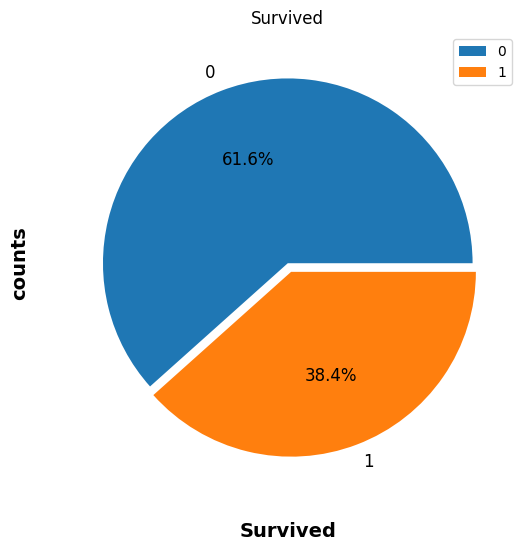

In [178]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = survived_counts.index, loc = "best")
plt.show()


* **Sex Counts**


In [179]:
sex_counts = df['Sex'].value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

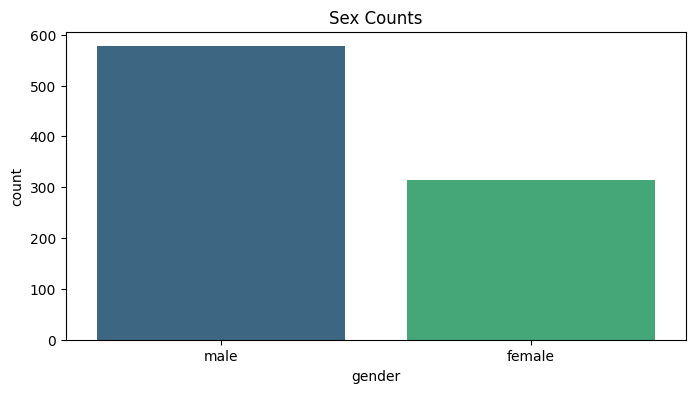

In [180]:
plt.figure(figsize=(8,4))
sns.barplot(x = sex_counts.index,y=sex_counts.values,palette='viridis')
plt.title('Sex Counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

* **Gender has Survived or Not**

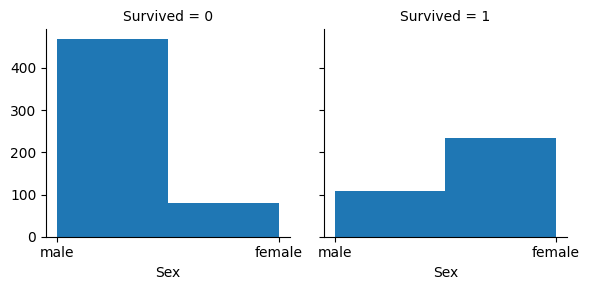

In [181]:
gender = sns.FacetGrid(df,col='Survived')
gender.map(plt.hist,'Sex',bins=2)

* **Siblings & Spouse Counts**

In [182]:
SibSp_counts = df['SibSp'].value_counts()
SibSp_counts

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

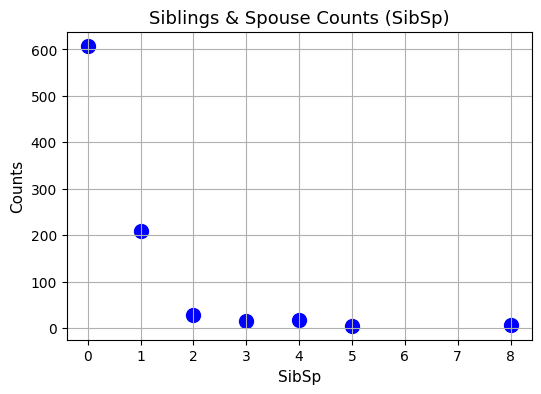

In [183]:
plt.figure(figsize=(6, 4))
plt.scatter(SibSp_counts.index, SibSp_counts.values, color='blue', marker='o', s=100)
plt.title('Siblings & Spouse Counts (SibSp)', fontsize=13)
plt.xlabel('SibSp', fontsize=11)
plt.ylabel('Counts', fontsize=11)
plt.grid(True)
plt.show()

* **SibSp has Survived or Not**



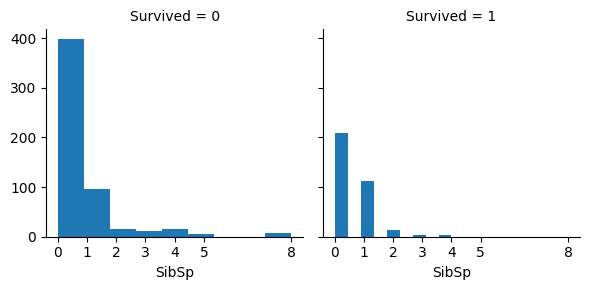

In [184]:
sibsp=sns.FacetGrid(df,col='Survived')
plt.xticks(SibSp_counts.index)
sibsp.map(plt.hist,'SibSp',bins=9)

* **Distribution (Histogram) of all the Features**

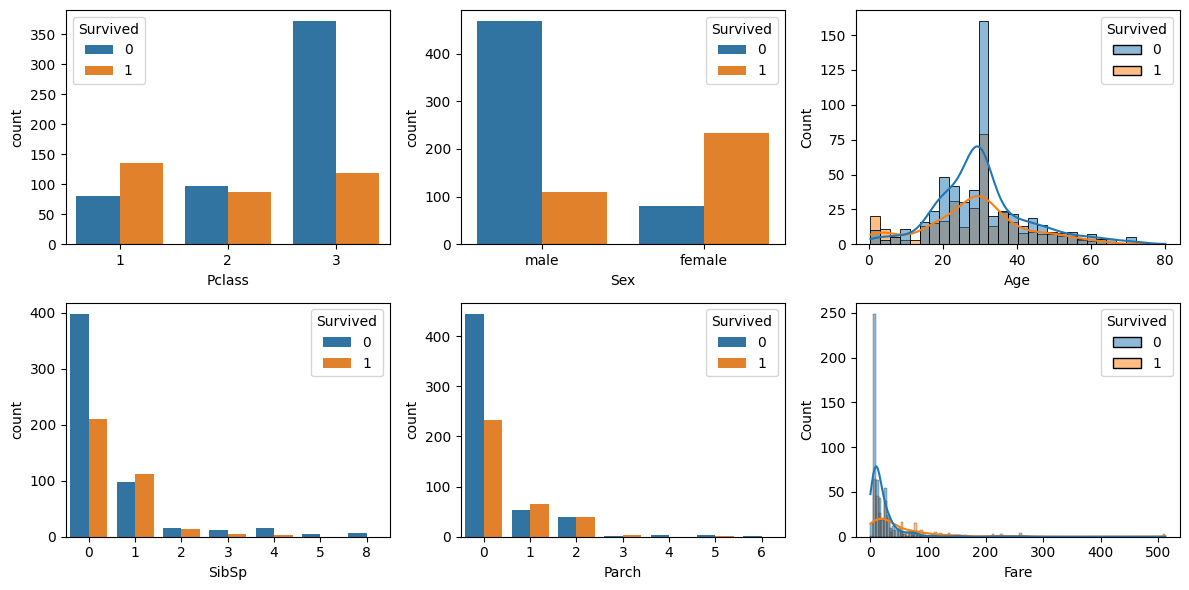

In [185]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.subplot(2, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.subplot(2, 3, 3)
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.subplot(2, 3, 4)
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.subplot(2, 3, 5)
sns.countplot(x='Parch', hue='Survived', data=df)
plt.subplot(2, 3, 6)
sns.histplot(x='Fare', hue='Survived', data=df, kde=True)
plt.tight_layout()
plt.show()

In [186]:
### Converting the 'Sex' to Binary 0 & 1 and 'Embarked' to S, C & Q

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

#### **Correlation Heatmap**

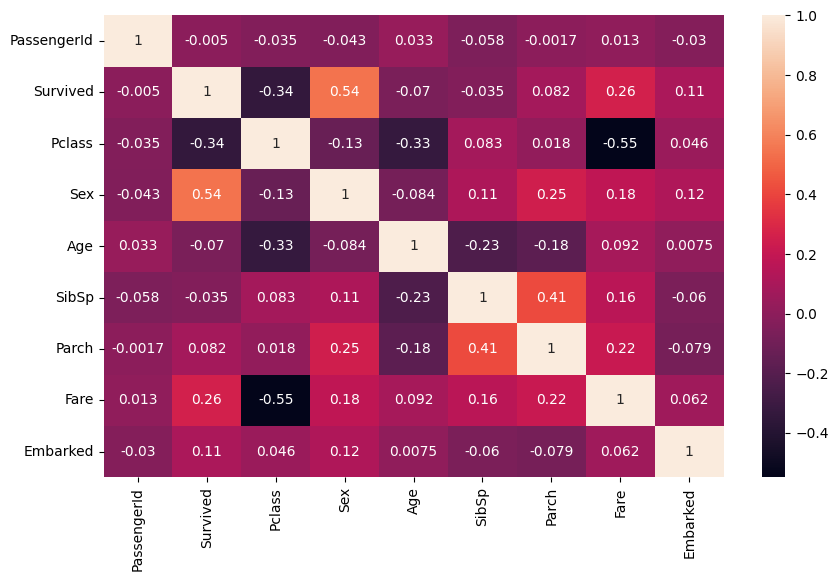

In [187]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### **Feature Engineering**


* **Feature & Target Selection**


In [188]:
features = ['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

In [189]:
X = df[features]
Y = df[target]

* **Splitting the Train & Test Data**

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

### **Implementing Different Machine Learning Algorithms**

#### **1. Logistic Regression**

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
lgr = LogisticRegression(random_state=2)

In [194]:
lgr.fit(X_train, Y_train)

LogisticRegression(random_state=2)

* **Model Evaluation**

In [195]:
X_pred = lgr.predict(X_train)

In [196]:
# Accuracy Score of Training Data

training_accuracy = accuracy_score(Y_train, X_pred)
print('Accuracy Score: ', training_accuracy)

Accuracy Score:  0.8117977528089888


In [197]:
X_test_pred = lgr.predict(X_test)

In [198]:
# Accuracy Score of Test Data

test_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy Score: ', test_accuracy)

Accuracy Score:  0.7653631284916201


* **Different Performance Metrics**

In [199]:
Y_pred = lgr.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7653631284916201
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.80      0.62      0.70        79

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.77      0.76       179



* **Confusion Matrix**

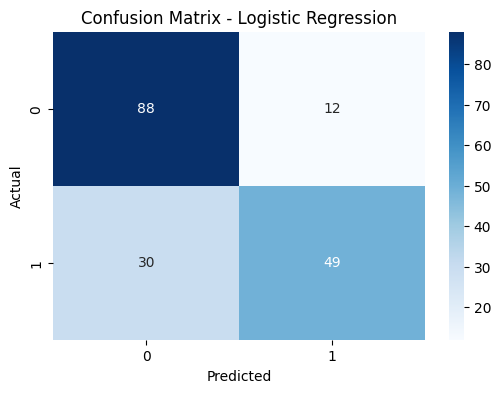

In [200]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **2. Decision Tree**

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dt= DecisionTreeClassifier(random_state=2)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=2)

* **Model Evaluation**

In [203]:
X_pred = dt.predict(X_train)

In [204]:
training_accuracy = accuracy_score(Y_train, X_pred)
print('Accuracy Score: ', training_accuracy)

Accuracy Score:  1.0


In [205]:
X_test_pred = dt.predict(X_test)

In [206]:
# Accuracy Score of Test Data

test_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy Score: ', test_accuracy)

Accuracy Score:  0.7374301675977654


* **Different Performance Metrics**

In [207]:
Y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7374301675977654
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.73      0.65      0.68        79

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



* **Confusion Matrix**

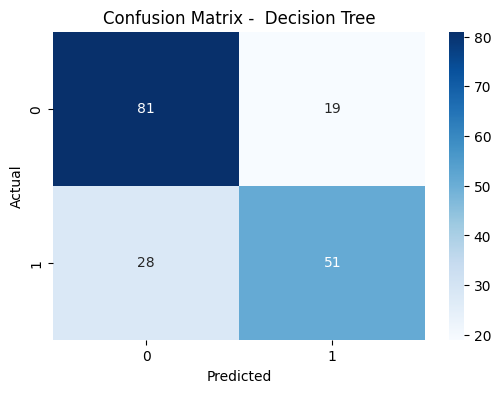

In [208]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix -  Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **3. KNN**

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

* **Model Evaluation**

In [210]:
X_pred = knn.predict(X_train)

In [211]:
# Accuracy Score of Training Data

training_accuracy = accuracy_score(Y_train, X_pred)
print('Accuracy Score: ', training_accuracy)

Accuracy Score:  0.7570224719101124


In [212]:
# Accuracy Score of Test Data

test_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy Score: ', test_accuracy)

Accuracy Score:  0.7374301675977654


* **Different Performance Metrics**

In [213]:
Y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.6145251396648045
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.85      0.71       100
           1       0.62      0.32      0.42        79

    accuracy                           0.61       179
   macro avg       0.62      0.58      0.57       179
weighted avg       0.62      0.61      0.58       179



* **Confusion Matrix**

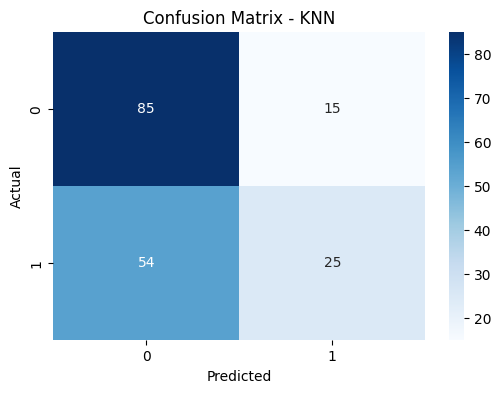

In [214]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **4. Random Forest**

In [215]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.7877094972067039

In [217]:
pred = rf.predict(X_test)

* **Confusion Matrix**

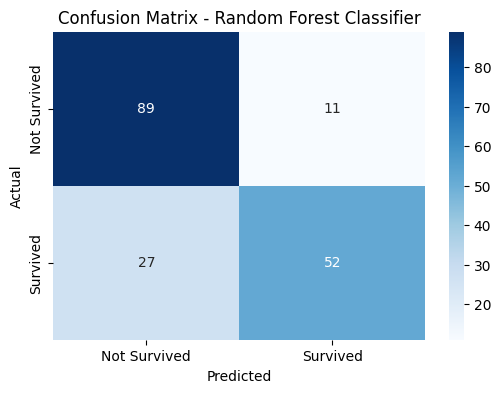

In [218]:
conf_matrix = confusion_matrix(Y_test, pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

#### **5. SVM (Support Vector Machine)**

In [219]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)

0.5810055865921788

In [220]:
prediction = svm.predict(X_test)

* **Confusion Matrix**

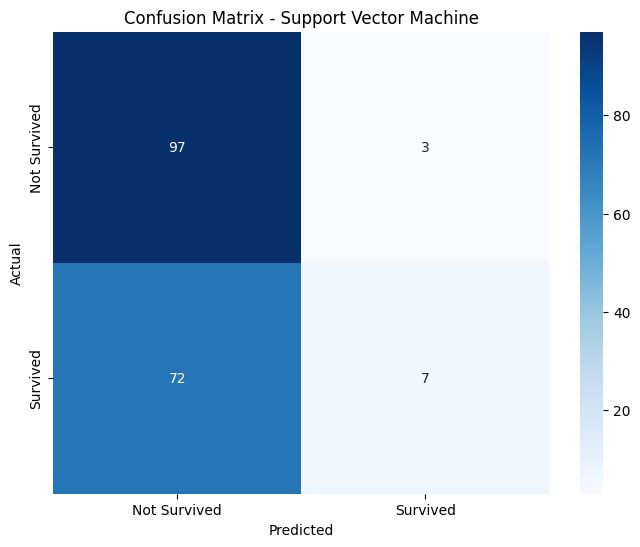

In [221]:
conf_matrix = confusion_matrix(Y_test, prediction)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

## **Comparison**

In [222]:
results = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Support Vector Machine'],
                        'Score': [lgr.score(X_test, Y_test)*100,
                                  dt.score(X_test, Y_test)*100,
                                  knn.score(X_test, Y_test)*100,
                                  rf.score(X_test, Y_test)*100,
                                  svm.score(X_test, Y_test)*100]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
78.770950,Random Forest
76.536313,Logistic Regression
73.743017,Decision Tree
61.452514,KNN
58.100559,Support Vector Machine


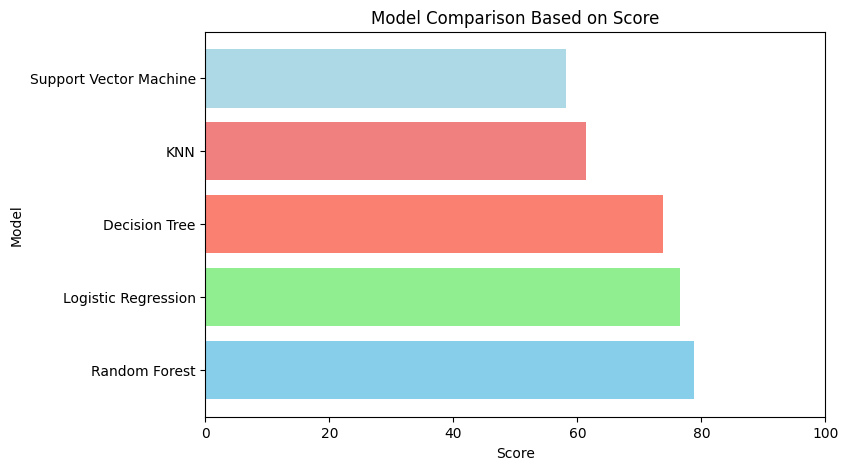

In [223]:
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue']

plt.figure(figsize=(8, 5))
plt.barh(result_df['Model'], result_df.index, color=colors)
plt.xlabel('Score')
plt.ylabel('Model')
plt.title('Model Comparison Based on Score')
plt.xlim(0, 100)
plt.show()